For the first implementations I totally forgot the feature-scaling part (pre-processing)\
The model did not work either. (Even for for iterraions which took over 1.5 hours)\
<font color="red">See the version with preprocessing "stolen-code" 
    (anyway the preprocessing part in that was added by me! Even that youtuber had missed it</font>

## Classification - Logistic regression - self coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

### Noiseless example
Lets see how logistic regression algorithm find a function for three-chunked-distribtution

<IPython.core.display.Javascript object>


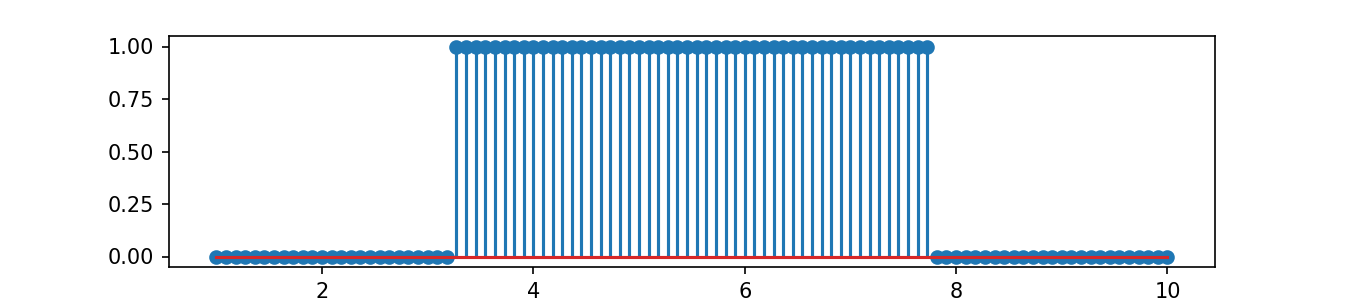

In [213]:
#generate some data for classification
m=100
x_ = np.linspace(1,10,m)


y1,y2,y3 = np.zeros(25),np.ones(50),np.zeros(25)
y=np.concatenate((y1,y2,y3))

fig,ax = plt.subplots(1,figsize=(9,2))
ax.stem(x_,y)
plt.show()

In [214]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [232]:
param_count =  7# y = w0 x0 + w1 x1 + w2 x2 + w3 x3 + .... ; x0 =1

#feature engineering
exponent_set = [-1,1,2,0.5,1.5,3,3.5,4,0.25,0.1]
x=np.array([np.ones(m)]).T
for i in range(1,param_count):
    x = np.hstack((x,np.array([x_**exponent_set[i]]).T))
      
    
print(x.shape)
print(x[0])

(100, 7)
[1. 1. 1. 1. 1. 1. 1.]


C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_7436/1844366379.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


[-640.80659957 -813.17179983 1358.65193459 -812.04562792 -270.57039864
 -347.06908482   73.12927399]


<IPython.core.display.Javascript object>


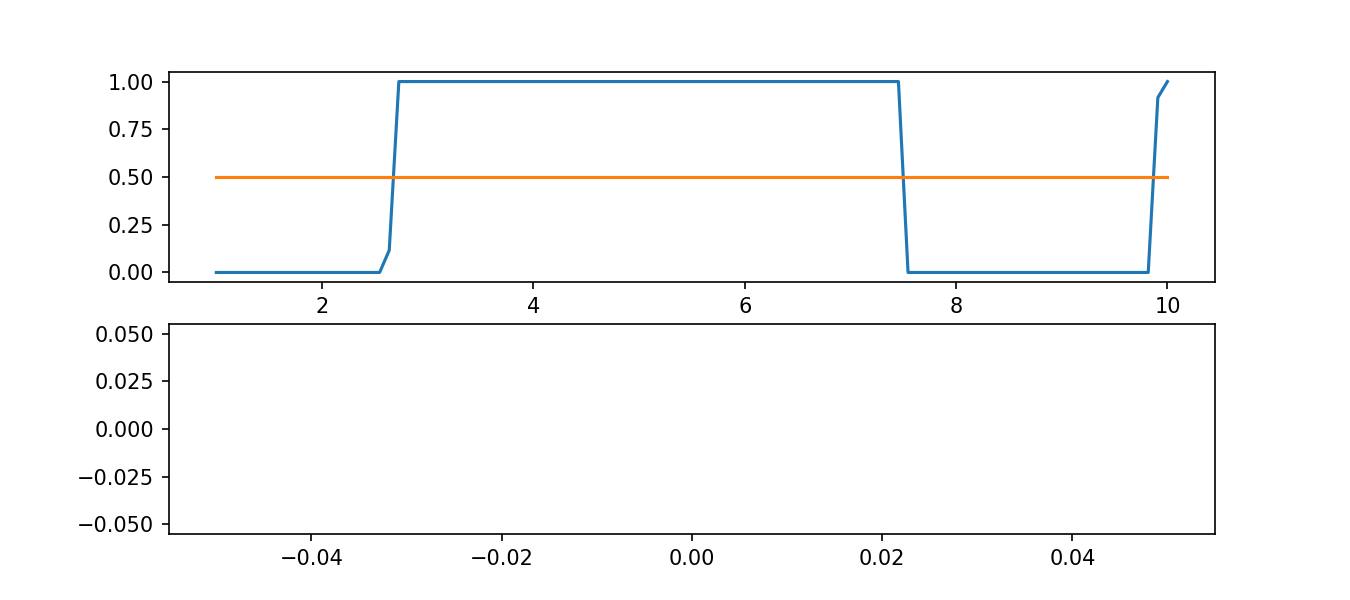

In [216]:
#Gradient ascent
# w = (1 - 2*np.random.rand(param_count)) * 10
w = np.zeros(param_count)
lr= 1e-3
iterations = 10_000_000
likelihood_history = []
for _ in range(iterations):
    for j in range(param_count):
#         likelihood = np.sum(y*np.log(sigmoid(x@w)) + (1-y)*np.log(1-sigmoid(x@w)))
#         likelihood_history.append(likelihood)
        
        w[j] += lr * np.sum((y-sigmoid(x@w))*x[:,j])/m
        
print(w)

#testing / validating result
y_validate = sigmoid(x@w)

fig,ax = plt.subplots(2,figsize=(9,4))
ax[0].plot(x_,y_validate)
ax[0].plot([1,10],[0.5,0.5])

ax[1].plot(likelihood_history)
ax[0].ticklabel_format(style='plain')
ax[1].ticklabel_format(style='plain')
plt.show()

After 10_000_000 iterrations it worked fine. Time taken to train was <font color="#ff0000">22mins</font>\
fairly useless!

### Same code but doing experiments

C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_7436/1844366379.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


[-641.21141744 -813.72166721 1359.61603534 -812.57858542 -270.75807443
 -347.38344615   73.20623106]


<IPython.core.display.Javascript object>


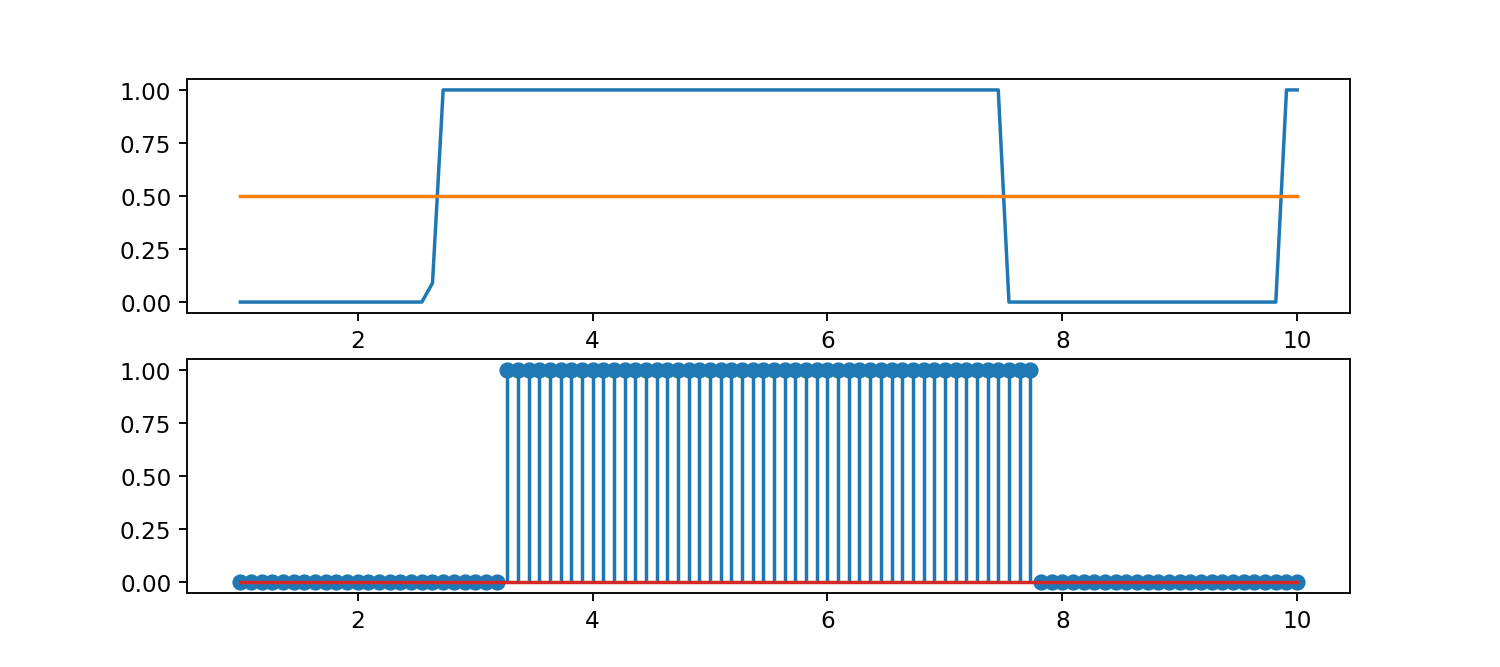

In [233]:
#Gradient ascent
# w = (1 - 2*np.random.rand(param_count)) * 10
w = np.array([-640.80659957, -813.17179983, 1358.65193459, -812.04562792,
              -270.57039864,-347.06908482,   73.12927399,])
lr= 1e-3
iterations = 10_000
likelihood_history = []
for _ in range(iterations):
    for j in range(param_count):
#         likelihood = np.sum(y*np.log(sigmoid(x@w)) + (1-y)*np.log(1-sigmoid(x@w)))
#         likelihood_history.append(likelihood)
        
        w[j] += lr * np.sum((y-sigmoid(x@w))*x[:,j])/m
        
print(w)

#testing / validating result
y_validate = sigmoid(x@w)

fig,ax = plt.subplots(2,figsize=(9,4))
ax[0].plot(x_,y_validate)
ax[0].plot([1,10],[0.5,0.5])

ax[1].stem(x_,y)
ax[0].ticklabel_format(style='plain')
ax[1].ticklabel_format(style='plain')
plt.show()